# DMbounds tutorial notebook
&copy; M. H&uuml;tten and M. Doro, 2022

Load the module:

In [1]:
from dmbounds import dmbounds as bounds

You can load all metadata in the database into a Pandas dataframe:

In [2]:
metadata_all = bounds.metadata()

If you want to filter the metadata, there are two ways:
1. The metadata can filtered interactively by a drop-down menu (shown in the following).
2. Using pandas syntax (shown further below.)

Filtering the data interactively has to be done in two subsequent cell executions. First, the interactive selection is called:

In [3]:
selection = bounds.interactive_selection()

Output()

Secondly, once the interactive selection of limits is done, a filtered pandas dataframe is created:

In [4]:
metadata_filtered = bounds.filter_metadata(selection)

The Pandas dataframe can be displayed in HTML including clickable weblinks with `show_metadata()`:

In [5]:
bounds.show_metadata(metadata_filtered)

,Instrument,Target,Mode,Channel,Year,Observation time,Title,DOI,Arxiv,Comment,File name
217,cta,gc,ann,bb,2015,500h,Indirect detection of dark matter with γ rays,10.1073/pnas.1308728111,1310.2695,"sensitivity, NFW profile",/Users/moritzhutten/Software/dmbounds/dmbounds/bounds/cta/cta_2015_gc_ann_bb_sens_nfw.ecsv
230,cta,gc,ann,bb,2015,500h,Indirect detection of dark matter with γ rays,10.1073/pnas.1308728111,1310.2695,"sensitivity, Einasto profile",/Users/moritzhutten/Software/dmbounds/dmbounds/bounds/cta/cta_2015_gc_ann_bb_sens_einasto.ecsv


You can retrieve a matplotlib figure from the filtered dataframe with the following method. Note that currently, only ten curves can be plotted simultaneously:

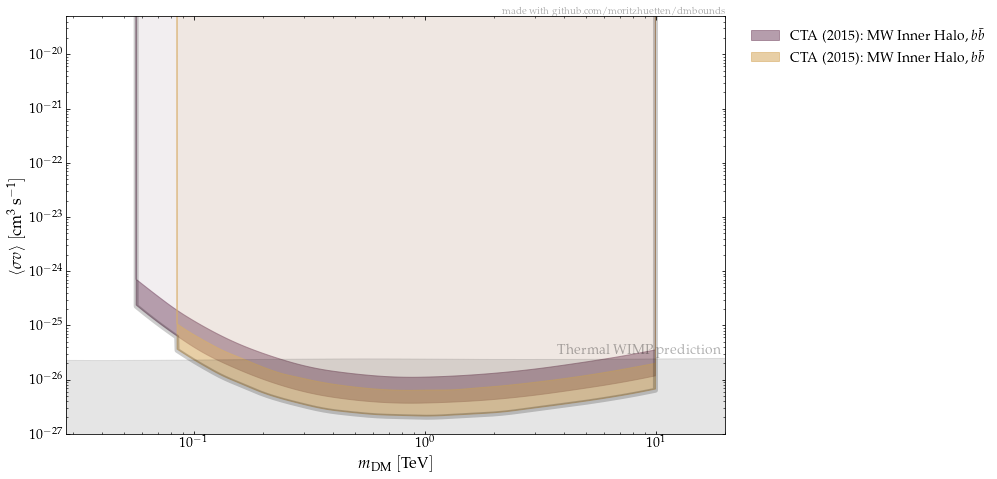

In [6]:
fig1, ax1 = bounds.plot(metadata_filtered)

The second way to filter the metadata is is to use pandas syntax for a "static filtering". This might be useful for a reproducible plotting script:

,Instrument,Target,Mode,Channel,Year,Observation time,Title,DOI,Arxiv,Comment,File name
251,lat,"[multicluster, 8]",ann,bb,2012,3y,Probing Dark Matter Decay and Annihilation with Fermi LAT Observations of Nearby Galaxy Clusters,10.1088/1475-7516/2012/01/042,1110.1529,,/Users/moritzhutten/Software/dmbounds/dmbounds/bounds/lat/lat_2012_multicluster_ann_bb.ecsv
290,hawc,m31,ann,bb,2018,1017d,Search for Dark Matter Gamma-ray Emission from the Andromeda Galaxy with the High-Altitude Water Cherenkov Observatory,10.1088/1475-7516/2018/06/043,1804.00628,MED model,/Users/moritzhutten/Software/dmbounds/dmbounds/bounds/hawc/hawc_2018_m31_ann_bb_med.ecsv


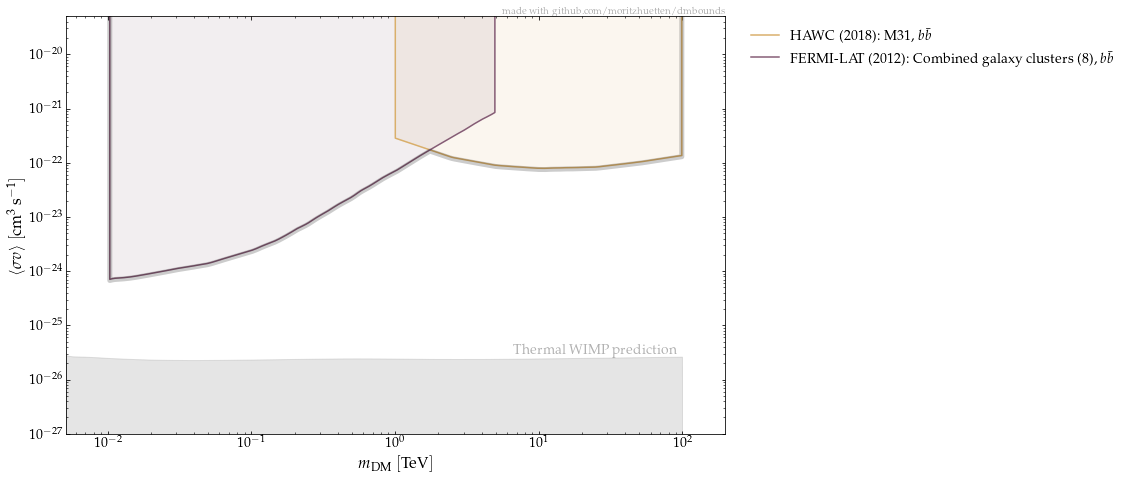

In [7]:
include_by_arxiv_ids = ['1110.1529', '1804.00628']
exclude_by_targets = ['fornaxcluster']
exclude_by_comments = ['MIN model', 'MAX model']
metadata_filtered = metadata_all.loc[(metadata_all['Arxiv'].isin(include_by_arxiv_ids)) \
                                     & (metadata_all['Channel'] == 'bb') \
                                     & (metadata_all['Mode'] == 'ann') \
                                     & (~metadata_all['Target'].isin(exclude_by_targets)) \
                                     & (~metadata_all['Comment'].isin(exclude_by_comments))
                                    ]
display(bounds.show_metadata(metadata_filtered))
bounds.plot(metadata_filtered);

You can define your own style for the figure:

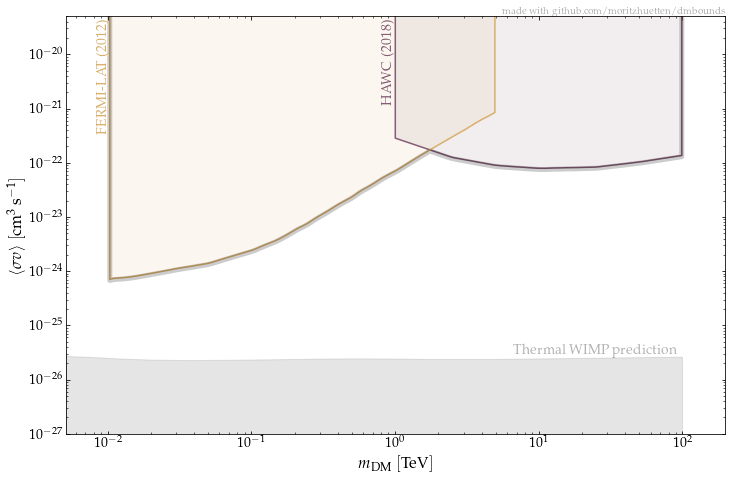

In [8]:
style = bounds.PlottingStyle('antique', legend='fancy')
fig2, ax2 = bounds.plot(metadata_filtered, style)

You can scale the axes or modify the colors:

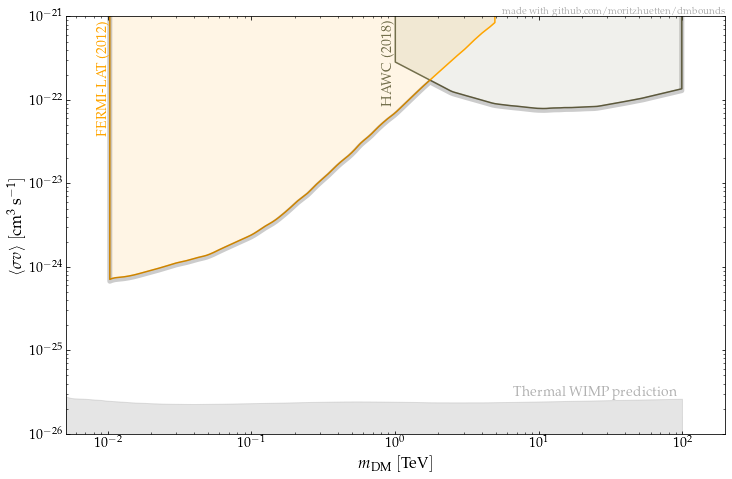

In [9]:
style.ymin = 1e-26
style.ymax = 1e-21
style.color_cycle = ['orange',3]
fig2, ax2 = bounds.plot(metadata_filtered, style);

You can also manually modify the matplotlib figure. However, you might have to modify each element individually to fit again, see e.g.:

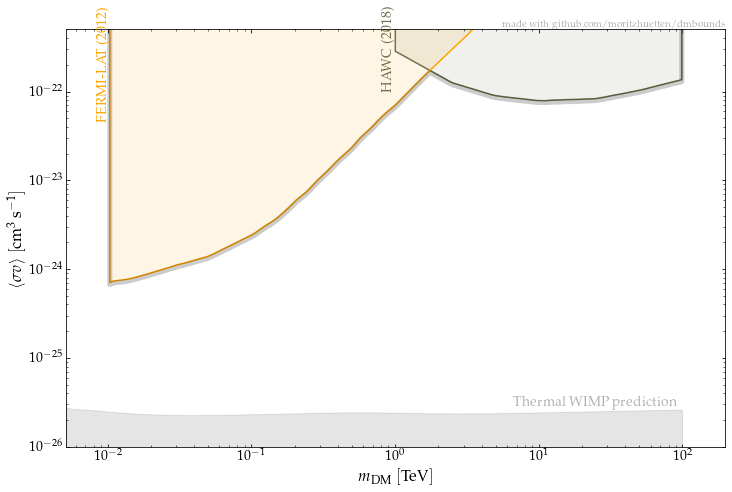

In [10]:
ax2.set_ylim([1e-26,5e-22]);
fig2

So let's move the label again to a suitable position:

In [11]:
import matplotlib
children = ax2.get_children()
texts = [element for element in children if isinstance(element, matplotlib.text.Text)]
texts

[Text(1.0039878060175302, 9e-22, 'HAWC (2018)'),
 Text(0.010352573089638026, 9e-22, 'FERMI-LAT (2012)'),
 Text(90.00000686645508, 2.592493e-26, 'Thermal WIMP prediction'),
 Text(1, 1, 'made with github.com/moritzhuetten/dmbounds'),
 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, '')]

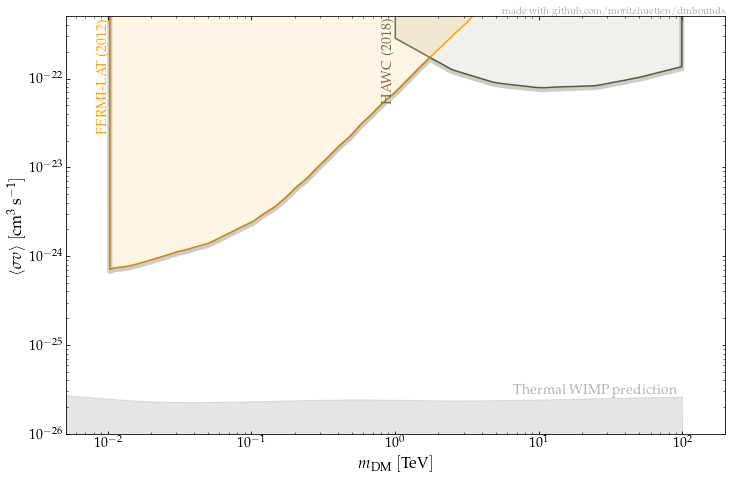

In [12]:
for text in texts[:2]:
    text.set_position((text.get_position()[0], 0.95 * 5e-22))
fig2

You can retrieve the data with the following command:

In [13]:
data = bounds.get_data(metadata_filtered)
display(bounds.show_metadata(metadata_filtered.iloc[[0]]))
display(data[0])

,Instrument,Target,Mode,Channel,Year,Observation time,Title,DOI,Arxiv,Comment,File name
251,lat,"[multicluster, 8]",ann,bb,2012,3y,Probing Dark Matter Decay and Annihilation with Fermi LAT Observations of Nearby Galaxy Clusters,10.1088/1475-7516/2012/01/042,1110.1529,,/Users/moritzhutten/Software/dmbounds/dmbounds/bounds/lat/lat_2012_multicluster_ann_bb.ecsv


mass,sigmav
GeV,cm3 / s
float32,float32
10.31,7.055e-25
11.31,7.404e-25
11.92,7.47e-25
21.85,9.456e-25
23.81,9.86e-25
31.1,1.129e-24
33.99,1.167e-24
44.4,1.319e-24


Finally, save the figure in desired format and resolution:

In [14]:
fig2.savefig("test.png", format='png', dpi=300, bbox_inches="tight")